# ♨️ Challenger Telecom II Latam (Welcome to Machine Learning)

Telecom, la empresa de comunicaciones que analizamos en el Challenger anterior nos ha solicitado una nueva misión 🎯


> *Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios*


Telecom quiere anticiparse al problema de la cancelación mediante la construcción de un pipeline robusto para esta etapa inicial de modelado.


## **Lectura y exploración de Datos** 🔎


In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import requests
import json
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.pipeline import Pipeline as imbpipline
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV
import pickle
import warnings
from xgboost import XGBClassifier

In [ ]:
# Definir una paleta de colores personalizada

custom_palette = ["#00CCC0", "#FF4858", "#80E0FA", "#8107F7", "#FA6850"]

In [ ]:
datos = pd.read_csv('/content/df_limpio.csv')
datos.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
1439,2122-YWVYA,No,Female,0.0,No,No,18.0,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.40,1380.40
4164,5887-IKKYO,No,Male,0.0,Yes,Yes,58.0,Yes,Yes,Fiber optic,...,No,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),94.35,5563.65
2503,3580-HYCSP,No,Male,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.30,7966.90
2170,3097-PYWXL,No,Female,0.0,Yes,Yes,4.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.95,82.90
6492,9206-GVPEQ,Yes,Male,0.0,Yes,No,13.0,No,No phone service,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,54.45,706.85


In [ ]:
datos.shape

(7043, 21)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   float64
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   float64
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [ ]:
datos.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#Eliminación de Columnas Irrelevantes

datos = datos.drop(columns=['customerID'],axis=1)

In [ ]:
#Buscamos valores nulos

missing_total_charges = datos['account.Charges.Total'].isnull().sum()
print("Valores nulos antes:", missing_total_charges)

Valores nulos antes: 11


In [ ]:
#Rellenamos valores nulos para el dataset

datos['account.Charges.Total'] = datos['account.Charges.Total'].fillna(datos['account.Charges.Total'].median())
datos.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0.0,Yes,Yes,9.0,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0.0,No,No,9.0,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0.0,No,No,4.0,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1.0,Yes,No,13.0,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1.0,Yes,No,3.0,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


## **Encoding**

Para este dataset utilizaremos  *pd.get_dummies() (One-Hot Encoding)*  así evitaremos imponer un orden inexistente y la mayoría de las variables categóricas son nominales.

In [ ]:

datos_encoded = pd.get_dummies(datos, drop_first=True)

print("Dimensiones del dataset original:", datos.shape)
print("Dimensiones después del encoding:", datos_encoded.shape)


datos_encoded.head()

Dimensiones del dataset original: (7043, 20)
Dimensiones después del encoding: (7043, 31)


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0.0,9.0,65.6,593.30,False,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0.0,9.0,59.9,542.40,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0.0,4.0,73.9,280.85,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1.0,13.0,98.0,1237.85,True,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1.0,3.0,83.9,267.40,True,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


## **Análisis de la Proporción de Churn**

In [ ]:
churn_counts = datos['Churn'].value_counts(normalize=True)  # en proporción
churn_counts_abs = datos['Churn'].value_counts()            # en números absolutos

print("Distribución absoluta:")
print(churn_counts_abs)
print("\nDistribución proporcional (%):")
print((churn_counts * 100).round(2))

Distribución absoluta:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Distribución proporcional (%):
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


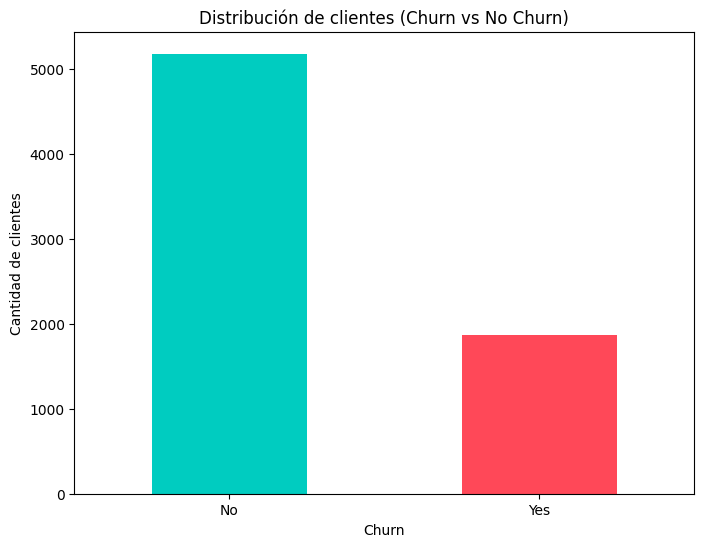

In [ ]:


plt.figure(figsize=(8,6))
churn_counts_abs.plot(kind='bar', color=['#00CCC0','#FF4858'])
plt.title("Distribución de clientes (Churn vs No Churn)")
plt.xlabel("Churn")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=0)
plt.show()


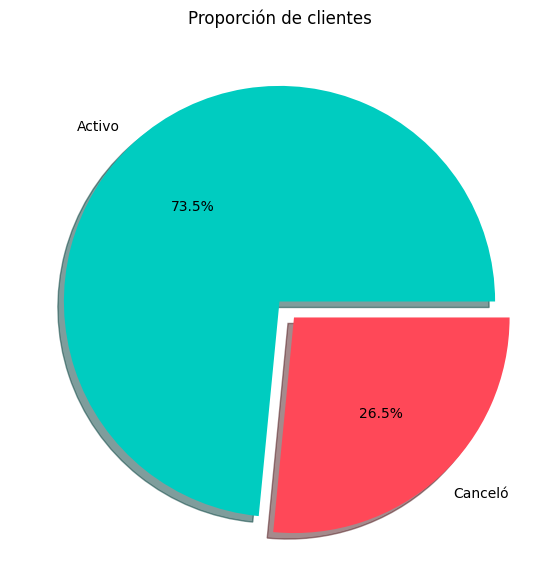

In [ ]:
# Gráfico circular (proporción)
plt.figure(figsize=(7,7))
datos['Churn'].value_counts().plot.pie(autopct='%1.1f%%',
                                    labels=['Activo','Canceló'],
                                    colors=['#00CCC0','#FF4858'],
                                    explode=[0,0.1],
                                    shadow=True)
plt.title("Proporción de clientes")
plt.ylabel("")  # ocultar etiqueta del eje Y
plt.show()

## Distribución de Variables Numéricas 🧮

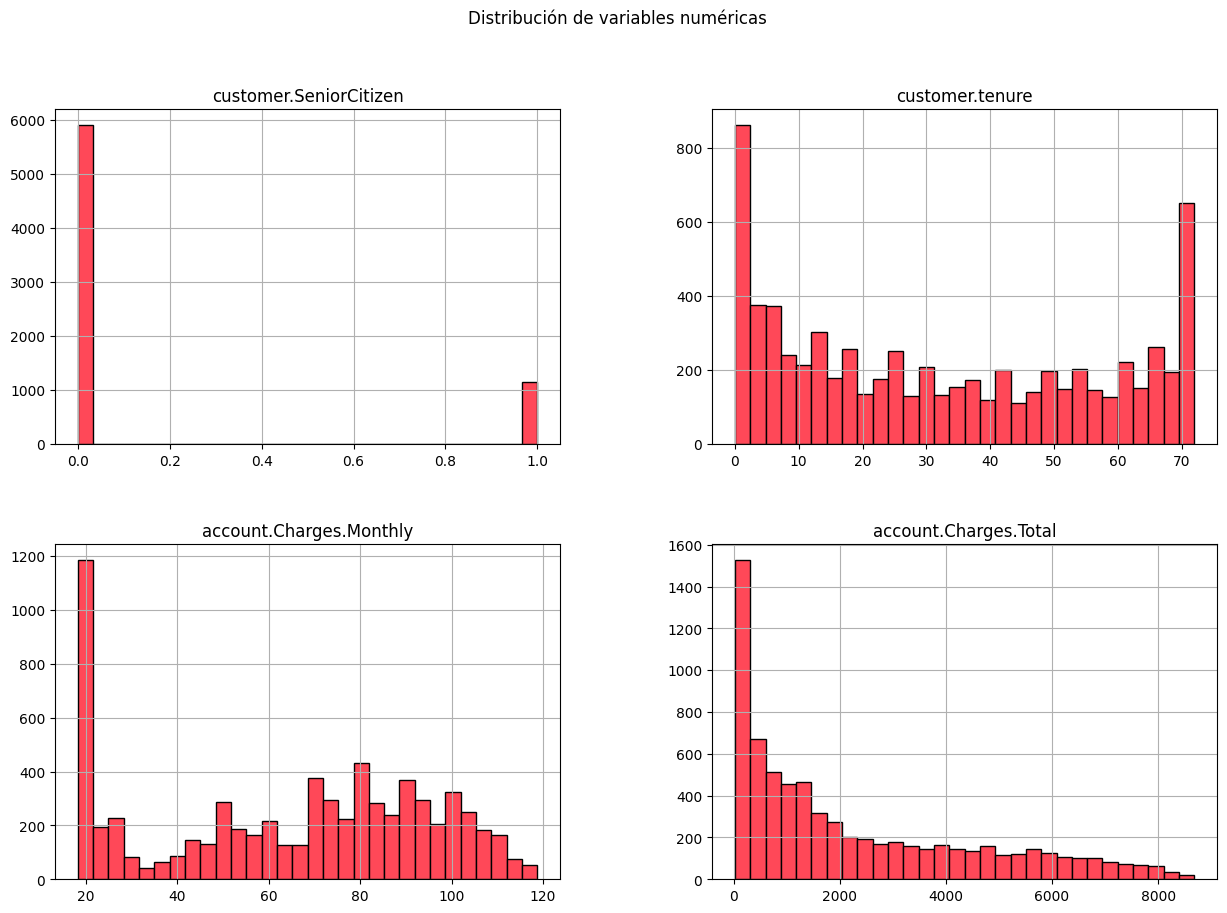

In [ ]:
datos.hist(figsize=(15,10), bins=30, color='#FF4858', edgecolor='black')
plt.suptitle("Distribución de variables numéricas")
plt.show()

## **Balanceo de Clases**✅

In [ ]:
# Separar variables predictoras (X) y variable objetivo (y)
X = datos_encoded.drop("Churn_Yes", axis=1)
y = datos_encoded["Churn_Yes"]

print("Distribución original de clases:", Counter(y))

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Distribución después de SMOTE:", Counter(y_res))

Distribución original de clases: Counter({False: 5174, True: 1869})
Distribución después de SMOTE: Counter({False: 5174, True: 5174})


# Análisis de Correlación

In [ ]:
# Correlación de churn con variables numéricas

correlaciones = datos_encoded.corr()["Churn_Yes"].sort_values(ascending=False)
print("Correlaciones con Churn:\n", correlaciones)

Correlaciones con Churn:
 Churn_Yes                                        1.000000
internet.InternetService_Fiber optic             0.308020
account.PaymentMethod_Electronic check           0.301919
account.Charges.Monthly                          0.193356
account.PaperlessBilling_Yes                     0.191825
customer.SeniorCitizen                           0.150889
internet.StreamingTV_Yes                         0.063228
internet.StreamingMovies_Yes                     0.061382
phone.MultipleLines_Yes                          0.040102
phone.PhoneService_Yes                           0.011942
customer.gender_Male                            -0.008612
phone.MultipleLines_No phone service            -0.011942
internet.DeviceProtection_Yes                   -0.066160
internet.OnlineBackup_Yes                       -0.082255
account.PaymentMethod_Mailed check              -0.091683
account.PaymentMethod_Credit card (automatic)   -0.134302
customer.Partner_Yes                          

/tmp/ipython-input-3287346069.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_encoded, x="Churn_Yes", y="customer.tenure", palette=custom_palette)
/tmp/ipython-input-3287346069.py:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.boxplot(data=datos_encoded, x="Churn_Yes", y="customer.tenure", palette=custom_palette)


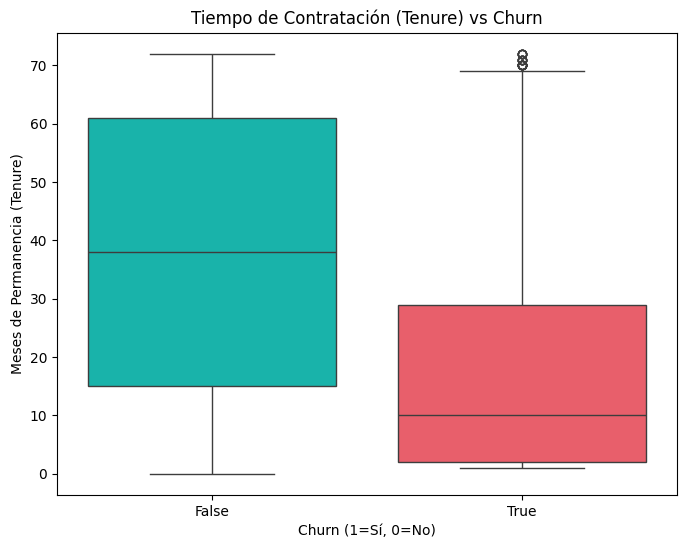

In [ ]:
#Correlación de Ternure y Churn

plt.figure(figsize=(8, 6))
sns.boxplot(data=datos_encoded, x="Churn_Yes", y="customer.tenure", palette=custom_palette)
plt.title("Tiempo de Contratación (Tenure) vs Churn")
plt.xlabel("Churn (1=Sí, 0=No)")
plt.ylabel("Meses de Permanencia (Tenure)")
plt.show()

/tmp/ipython-input-3666608316.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_encoded, x="Churn_Yes", y="account.Charges.Total", palette=custom_palette)
/tmp/ipython-input-3666608316.py:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.boxplot(data=datos_encoded, x="Churn_Yes", y="account.Charges.Total", palette=custom_palette)


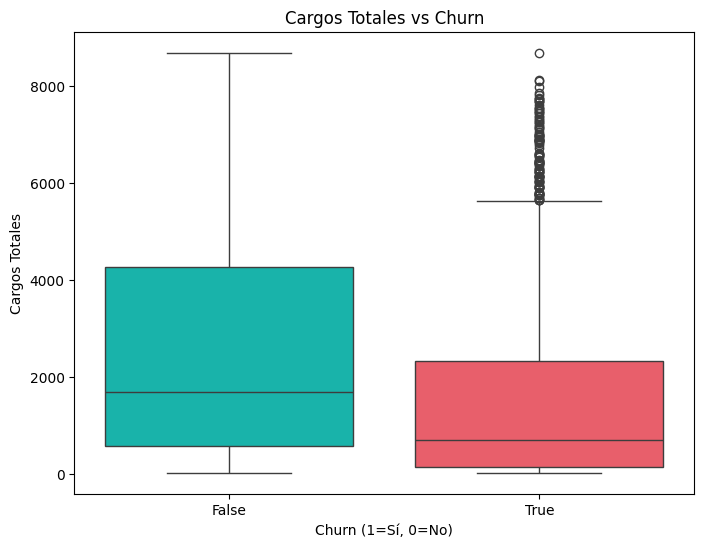

In [ ]:
#Correlación de Cargos Totales y Churn

plt.figure(figsize=(8, 6))
sns.boxplot(data=datos_encoded, x="Churn_Yes", y="account.Charges.Total", palette=custom_palette)
plt.title("Cargos Totales vs Churn")
plt.xlabel("Churn (1=Sí, 0=No)")
plt.ylabel("Cargos Totales")
plt.show()

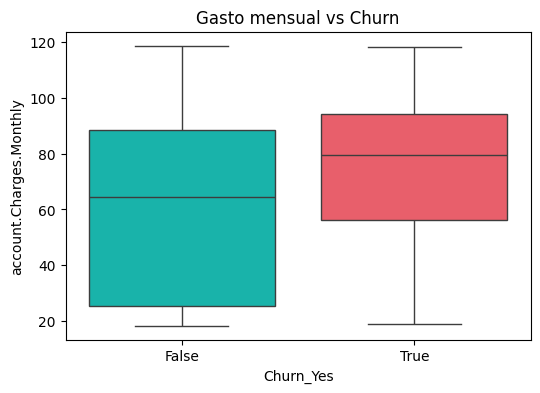

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(6,4))
sns.boxplot(x="Churn_Yes", y="account.Charges.Monthly", data=datos_encoded, palette=custom_palette)
plt.title("Gasto mensual vs Churn")
plt.show()


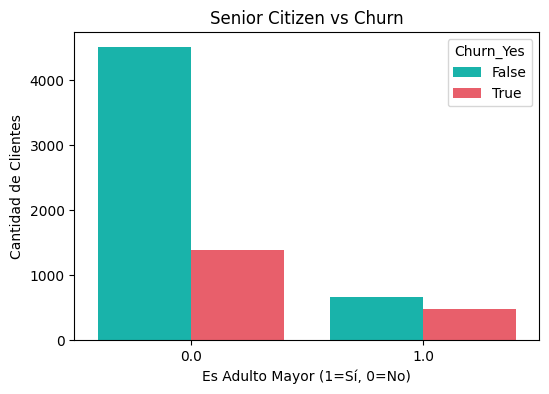

In [ ]:
#Correlación de Rango etáreo y Churn

plt.figure(figsize=(6,4))
sns.countplot(data=datos_encoded, x="customer.SeniorCitizen", hue="Churn_Yes", palette=custom_palette)
plt.title("Senior Citizen vs Churn")
plt.xlabel("Es Adulto Mayor (1=Sí, 0=No)")
plt.ylabel("Cantidad de Clientes")
plt.show()

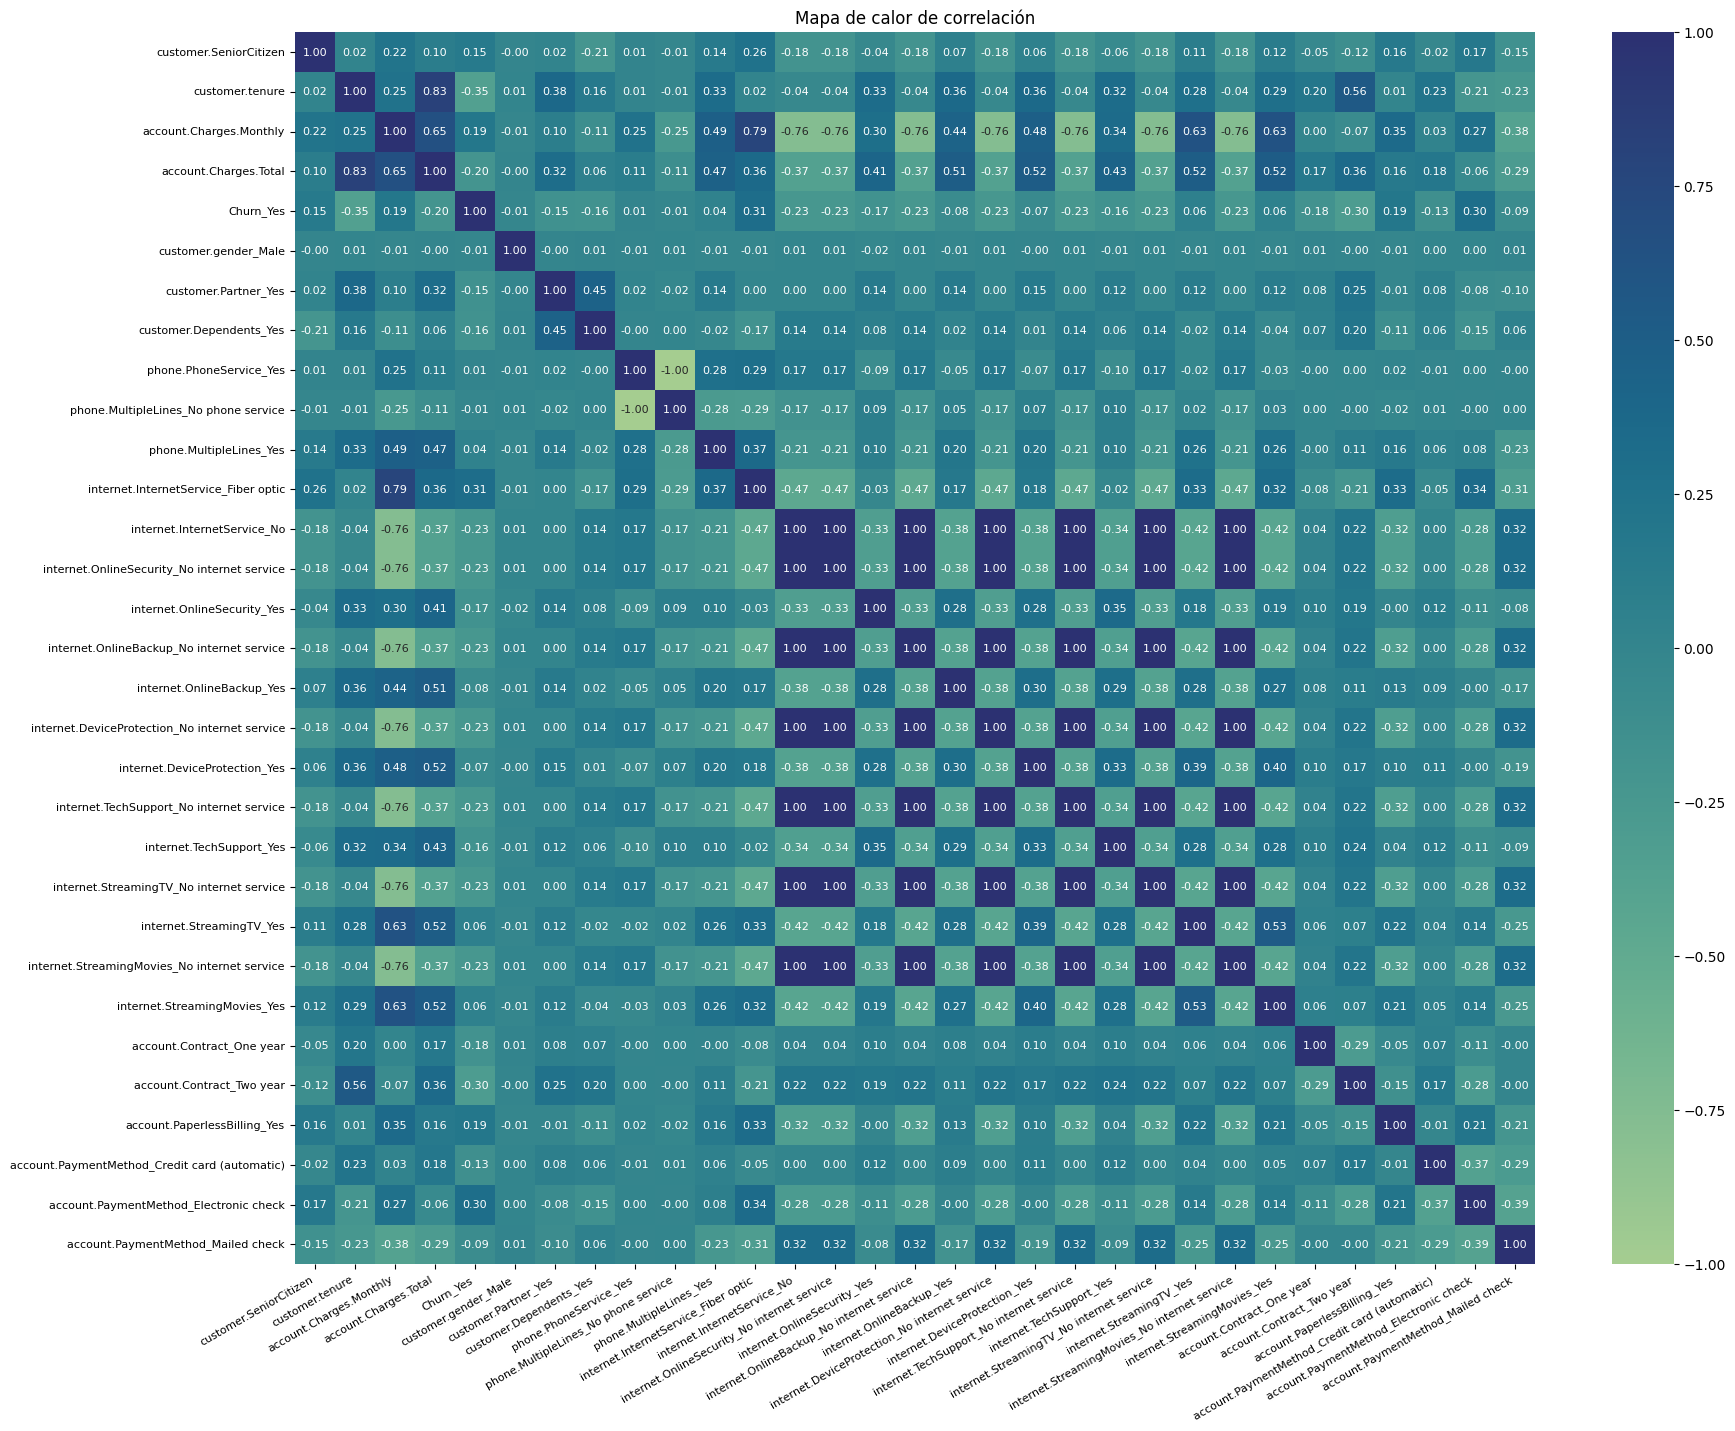

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(datos_encoded.corr(), annot=True, cmap="crest", fmt=".2f", annot_kws={'size': 8}) # Ajustar tamaño de fuente de anotaciones
plt.title("Mapa de calor de correlación")
plt.xticks(rotation=30, ha='right', fontsize=8) # Rotar y ajustar tamaño de fuente de ticks del eje X
plt.yticks(fontsize=8) # Ajustar tamaño de fuente de ticks del eje Y
plt.show()

**Variables más correlacionadas con la cancelación (Churn):**


*   *customer.tenure (tiempo con la empresa)* tiene correlación negativa fuerte (-0.35): cuanto más tiempo llevan, menos cancelan.
*   *account.Charges.Total* también correlaciona negativamente (-0.19): los que han pagado más en total suelen permanecer.
*   *account.Charges.Monthly* tiene correlación positiva (0.19): clientes con cargos mensuales más altos tienden a cancelar más.
*  *customer.SeniorCitizen* correlaciona levemente positivo (0.15): los adultos mayores cancelan un poco más.












# Creando un Modelado Predictivo 🤖

**Separación del dataSet en entrenamiento y prueba**

In [ ]:
# Definimos X (features) e y (target)
X = datos_encoded.drop("Churn_Yes", axis=1)
y = datos_encoded["Churn_Yes"]

# Dividir en train/test (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


**REGRESIÓN LOGÍSTICA / KNN**

In [ ]:
# 2. REGRESIÓN LOGÍSTICA / KNN

print("\n📌 REGRESIÓN LOGÍSTICA")
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred_log), 3))
print(classification_report(y_test, y_pred_log))


📌 REGRESIÓN LOGÍSTICA
Accuracy: 0.798
              precision    recall  f1-score   support

       False       0.84      0.89      0.87      1552
        True       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



**RANDOM FOREST**

In [ ]:
print("\n🌲 RANDOM FOREST")
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf),3)
print(classification_report(y_test, y_pred_rf))


🌲 RANDOM FOREST
Accuracy: 0.7908187411263606 3
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1552
        True       0.64      0.49      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



**XGBOOST**

In [ ]:
print("\n⚡ XGBOOST")
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb), 3)
print(classification_report(y_test, y_pred_xgb))


⚡ XGBOOST
Accuracy: 0.7780407004259347 3
              precision    recall  f1-score   support

       False       0.83      0.87      0.85      1552
        True       0.60      0.51      0.55       561

    accuracy                           0.78      2113
   macro avg       0.71      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



**GRAFICOS DE MATRIZ DE CADA MODELO Y SUS RESULTADOS**

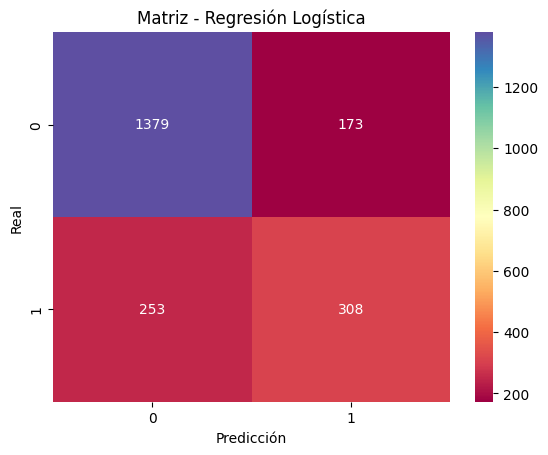

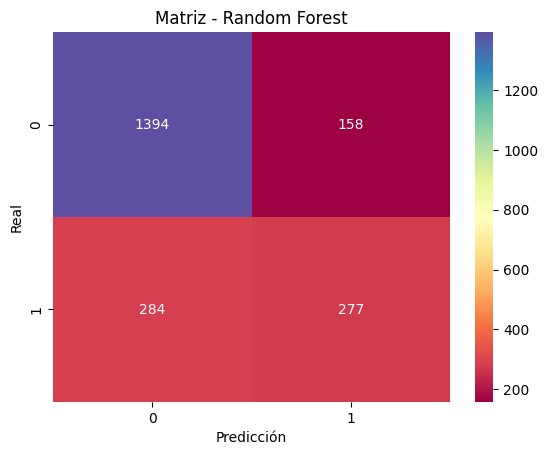

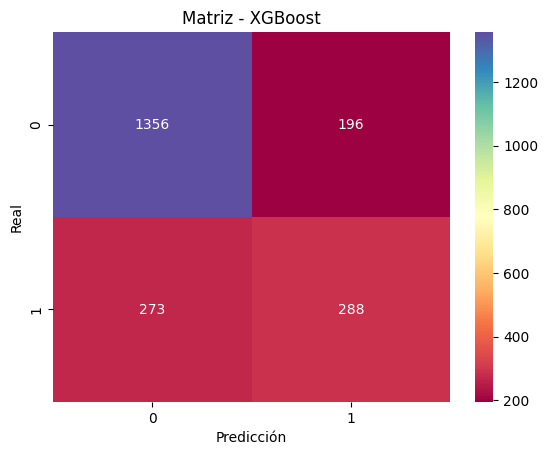

In [ ]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Spectral")
    plt.title(title)
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

plot_conf_matrix(y_test, y_pred_log, "Matriz - Regresión Logística")
plot_conf_matrix(y_test, y_pred_rf, "Matriz - Random Forest")
plot_conf_matrix(y_test, y_pred_xgb, "Matriz - XGBoost")

In [ ]:
# Estandarizar datos (solo para regresión logística)

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42)
}

In [ ]:
resultados = []

for nombre, modelo in modelos.items():
    if nombre == "Regresión Logística":
        modelo.fit(X_train_scaled, y_train)
        y_train_pred = modelo.predict(X_train_scaled)
        y_test_pred = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train, y_train)
        y_train_pred = modelo.predict(X_train)
        y_test_pred = modelo.predict(X_test)

    # Métricas
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    resultados.append({
        "Modelo": nombre,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Test Precision": precision_score(y_test, y_test_pred),
        "Test Recall": recall_score(y_test, y_test_pred),
        "Test F1": f1_score(y_test, y_test_pred)
    })


In [ ]:
# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados)

📊 Resultados comparativos:


,Modelo,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1
0,Regresión Logística,0.811156,0.797918,0.640167,0.545455,0.589028
1,Random Forest,0.997769,0.790819,0.636782,0.493761,0.556225
2,XGBoost,0.944016,0.778041,0.595041,0.513369,0.551196


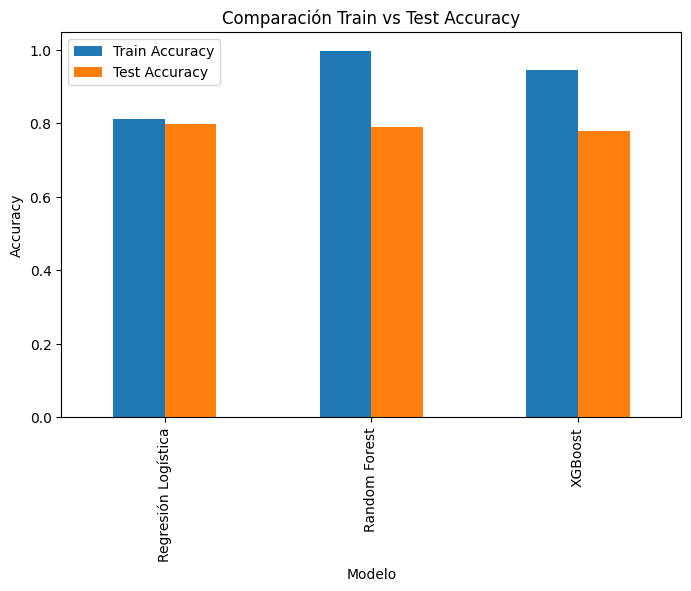

In [ ]:
# --------------------
print("📊 Resultados comparativos:")
display(df_resultados)

# Graficar desempeño en Train vs Test
df_resultados.set_index("Modelo")[["Train Accuracy", "Test Accuracy"]].plot(kind="bar", figsize=(8,5))
plt.title("Comparación Train vs Test Accuracy")
plt.ylabel("Accuracy")
plt.show()

**Reporte automático de overfitting / underfitting**

In [ ]:
print("\n🔎 Reporte automático de desempeño:\n")

for i, row in df_resultados.iterrows():
    modelo = row["Modelo"]
    train_acc = row["Train Accuracy"]
    test_acc = row["Test Accuracy"]

    diferencia = train_acc - test_acc

    if train_acc < 0.65 and test_acc < 0.65:
        conclusion = "❌ Underfitting: el modelo no capta bien los patrones de los datos."
    elif diferencia > 0.15:
        conclusion = "⚠️ Overfitting: rinde muy bien en entrenamiento pero pierde generalización en test."
    else:
        conclusion = "✅ Buen desempeño: balance adecuado entre train y test."

    print(f"{modelo}: {conclusion}")


🔎 Reporte automático de desempeño:

Regresión Logística: ✅ Buen desempeño: balance adecuado entre train y test.
Random Forest: ⚠️ Overfitting: rinde muy bien en entrenamiento pero pierde generalización en test.
XGBoost: ⚠️ Overfitting: rinde muy bien en entrenamiento pero pierde generalización en test.


## Entrenar modelos (Logística, Random Forest, XGBoost) y comparar

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Peso de clase para desbalance
pos_weight = (len(y_train) - y_train.sum()) / y_train.sum()

# Pipelines
pipe_lr = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),   # with_mean=False por si hay muchas dummies esparcidas
    ("clf", LogisticRegression(max_iter=2000, class_weight='balanced', n_jobs=-1))
])

rf = RandomForestClassifier(
    n_estimators=400, max_depth=None, min_samples_leaf=2,
    random_state=42, class_weight='balanced_subsample', n_jobs=-1
)

xgb = XGBClassifier(
    n_estimators=600, learning_rate=0.05, max_depth=5, subsample=0.8, colsample_bytree=0.8,
    reg_lambda=1.0, reg_alpha=0.0, eval_metric="logloss", random_state=42,
    n_jobs=-1, scale_pos_weight=float(pos_weight)
)

modelos = {
    "LogisticRegression": pipe_lr,
    "RandomForest": rf,
    "XGBoost": xgb
}

resultados = []
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:,1]

    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_proba)
    })

df_result = pd.DataFrame(resultados).sort_values("F1", ascending=False)
df_result


,Modelo,Accuracy,Precision,Recall,F1,ROC_AUC
0,LogisticRegression,0.735920,0.501676,0.800357,0.616758,0.840662
1,RandomForest,0.780407,0.578100,0.639929,0.607445,0.834718
2,XGBoost,0.752958,0.525896,0.705882,0.602740,0.824424


## Importancias de variables (RF y XGB) + SHAP (explicabilidad)

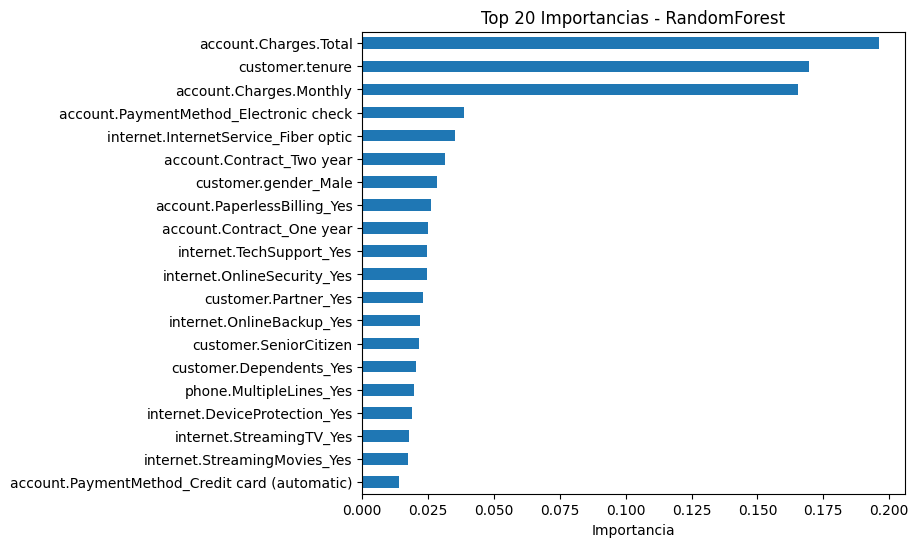

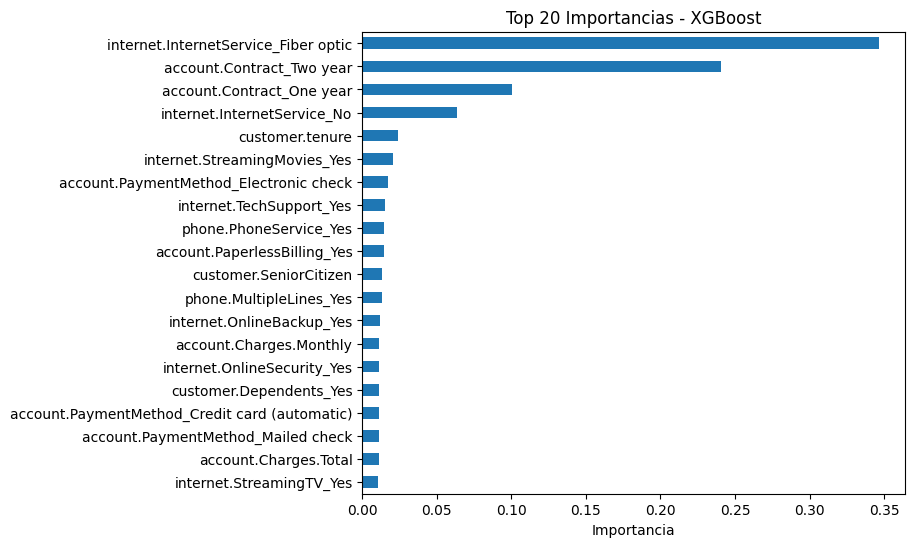

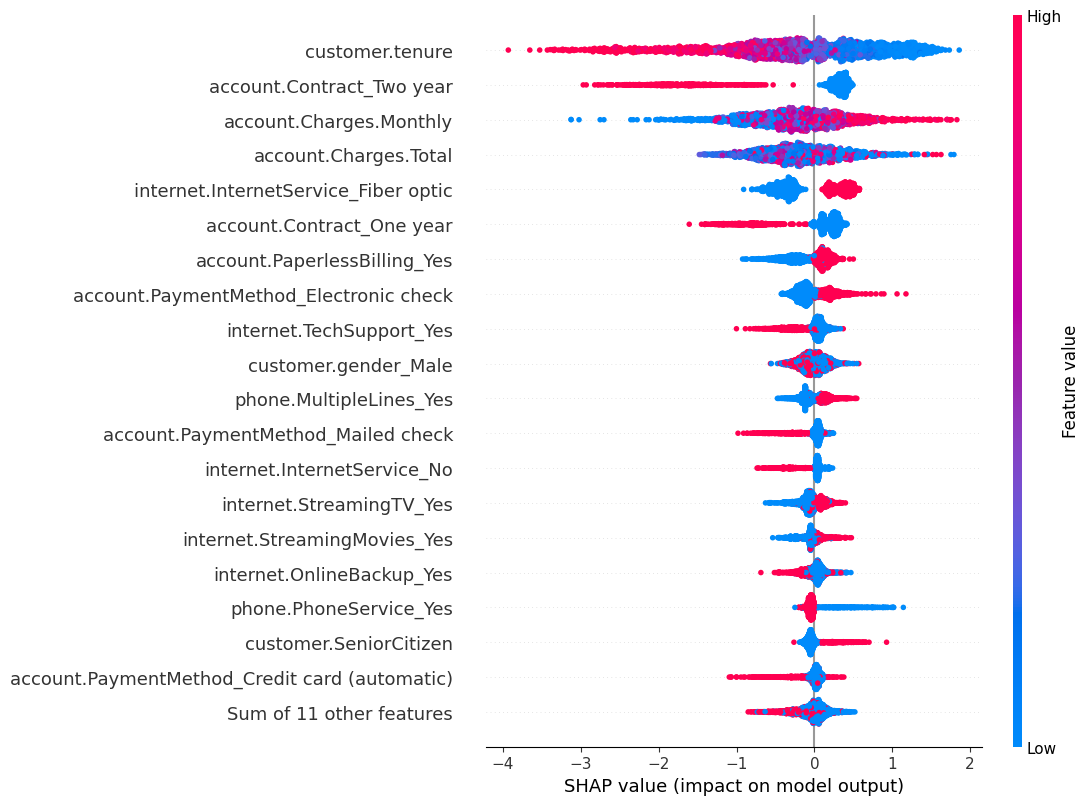

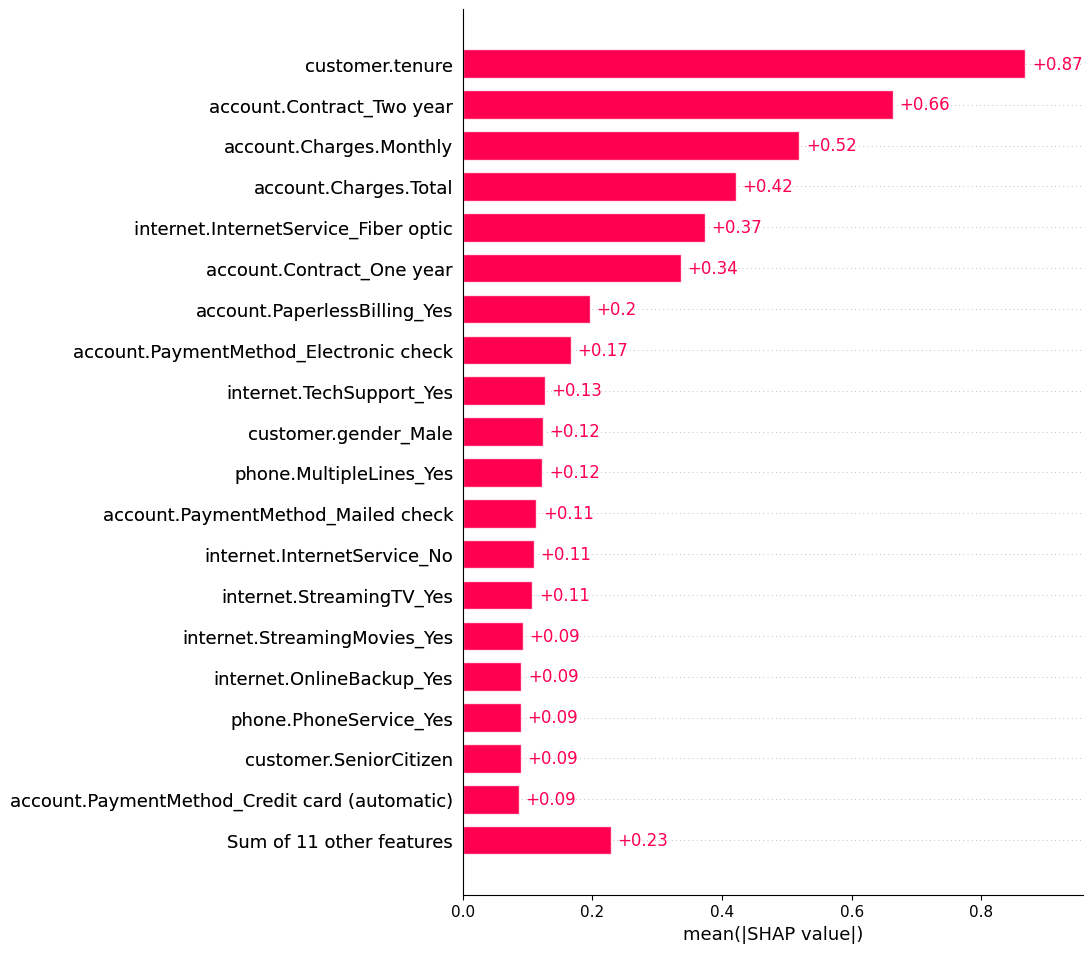

In [ ]:
rf.fit(X_train, y_train)
imp_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(20)

plt.figure(figsize=(7,6))
imp_rf[::-1].plot(kind="barh")
plt.title("Top 20 Importancias - RandomForest")
plt.xlabel("Importancia")
plt.show()

# --- Importancias XGB ---
xgb.fit(X_train, y_train)
imp_xgb = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False).head(20)

plt.figure(figsize=(7,6))
imp_xgb[::-1].plot(kind="barh")
plt.title("Top 20 Importancias - XGBoost")
plt.xlabel("Importancia")
plt.show()

# --- SHAP con XGBoost ---
import shap
explainer = shap.TreeExplainer(xgb)
shap_values = explainer(X_test)

# Summary plot (distribución global de efectos)
shap.plots.beeswarm(shap_values, max_display=20)

# Bar plot (magnitud media de efecto)
shap.plots.bar(shap_values, max_display=20)

## Selector de umbral (threshold tuning) con métricas

PR-AUC: 0.621 | ROC-AUC: 0.821


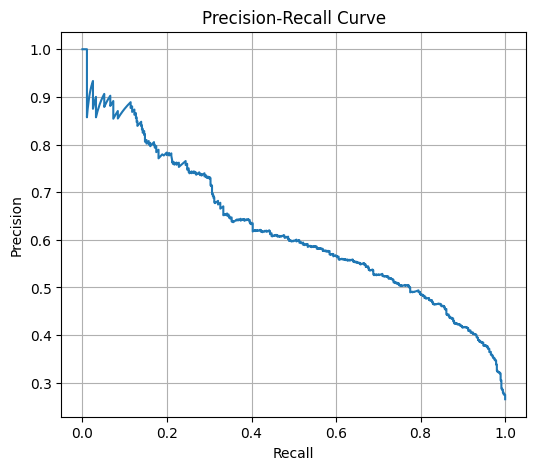

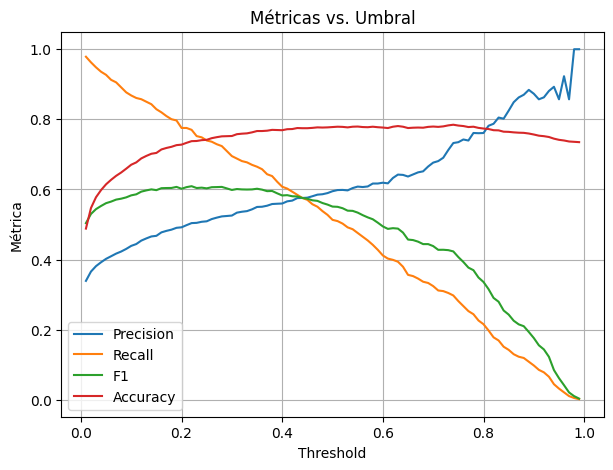

,threshold,precision,recall,f1,accuracy
21,0.22,0.504084,0.770053,0.609309,0.737814
18,0.19,0.490670,0.796791,0.607337,0.726455
27,0.28,0.523196,0.723708,0.607330,0.751538
26,0.27,0.519695,0.729055,0.606825,0.749172
20,0.21,0.498282,0.775401,0.606695,0.733081
25,0.26,0.515605,0.736185,0.606461,0.746332
23,0.24,0.507860,0.748663,0.605187,0.740653
17,0.18,0.485405,0.800357,0.604307,0.721723
22,0.23,0.504785,0.752228,0.604152,0.738287
16,0.17,0.481953,0.809269,0.604125,0.718410


In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Usamos el mejor modelo (elige por F1 o PR-AUC). Aquí tomamos XGB ya entrenado:
best_model = xgb
y_proba = best_model.predict_proba(X_test)[:,1]

# Barrer umbrales
ths = np.linspace(0.01, 0.99, 99)
rows = []
for t in ths:
    y_hat = (y_proba >= t).astype(int)
    rows.append({
        "threshold": t,
        "precision": precision_score(y_test, y_hat, zero_division=0),
        "recall": recall_score(y_test, y_hat),
        "f1": f1_score(y_test, y_hat),
        "accuracy": accuracy_score(y_test, y_hat)
    })
th_table = pd.DataFrame(rows)

# Curvas PR y ROC
prec, rec, th_pr = precision_recall_curve(y_test, y_proba)
fpr, tpr, th_roc = roc_curve(y_test, y_proba)
pr_auc = auc(rec, prec)
roc_auc = auc(fpr, tpr)

print(f"PR-AUC: {pr_auc:.3f} | ROC-AUC: {roc_auc:.3f}")

# Graficar PR
plt.figure(figsize=(6,5))
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

# Graficar métricas vs umbral
plt.figure(figsize=(7,5))
plt.plot(th_table["threshold"], th_table["precision"], label="Precision")
plt.plot(th_table["threshold"], th_table["recall"], label="Recall")
plt.plot(th_table["threshold"], th_table["f1"], label="F1")
plt.plot(th_table["threshold"], th_table["accuracy"], label="Accuracy")
plt.xlabel("Threshold")
plt.ylabel("Métrica")
plt.title("Métricas vs. Umbral")
plt.legend()
plt.grid(True)
plt.show()

th_table.sort_values("f1", ascending=False).head(10)


# 💼 INFORME DE RESULTADOS DEL ANÁLISIS Y RECOMENDACIONES

# **Resumen Ejecutivo**
La variable objetivo Churn es minoritaria (desbalance moderado: “canceló” < “sigue activo”). Esto afecta la evaluación de modelos y exige métricas y técnicas específicas (Recall/PR-AUC, class weighting, SMOTE, threshold tuning).



---





# Los factores con mayor relación con el churn en nuestro EDA fueron:

• *customer.tenure:* correlación negativa marcada (~−0.35). Clientes con más antigüedad cancelan menos.

• *account.Charges.Total:* correlación negativa (~−0.19). Mayor facturación acumulada → menor churn (clientes más “anclados”).

• *account.Charges.Monthly:* correlación positiva (~+0.19). Cargos mensuales altos se asocian a más cancelación.

• customer.SeniorCitizen: correlación levemente positiva (~+0.15).

#**A nivel categórico:**

Contrato: los Month-to-month muestran mayor proporción de churn que One year / Two year.

Métodos de pago y servicios/beneficios (seguridad en línea, soporte técnico, etc.) muestran diferencias visibles de tasa de churn por segmento, lo que sugiere oportunidades de bundling y retención proactiva.

#**Calidad de datos**

• ID: customerID eliminado para modelado (solo identificador).

• Nulos: account.Charges.Total presentaba nulos; se imputó con mediana (robusto a outliers).

• Categóricas: codificadas con One-Hot Encoding (get_dummies, drop_first=True) para evitar orden falso y multicolinealidad.

• Escalado: Para modelos sensibles a escala (p. ej., regresión logística/SVM) usamos estandarización (Z-score); árboles/ensembles no lo requieren.

# **Variable objetivo y desbalance**

Churn es la clase minoritaria. Implicancias:

Las métricas basadas en exactitud (Accuracy) pueden ser engañosas.

Priorizar Recall de la clase “Churn”, F1 y PR-AUC.

Considerar pesos de clase, SMOTE y ajuste de umbral según la capacidad de contacto/retención del negocio.

# **Señales/Drivers del churn**

Antigüedad baja (tenure) → mayor riesgo.

Onboarding y acompañamiento intensivo en los primeros meses.

Cargos mensuales altos → sensibilidad al precio.

Planes escalonados, descuentos segmentados, bundles con TV/Internet/servicios de valor.

Menor facturación acumulada (Total Charges) → clientes “recién llegados”.

Programas de fidelización temprana y welcome offers.

Segmento SeniorCitizen con algo más de riesgo.

Soporte simplificado, comunicación clara, canales preferidos, ofertas de valor percibido (p. ej. soporte técnico prioritario).

Nota: Los gráficos por tipo de contrato mostraron mayor churn en Month-to-month. Incentivar compromisos más largos reduce volatilidad.


**Random Forest / XGBoost**

Capturan no linealidad e interacciones.

Riesgo: overfitting si no se regula.

Ajustes: validación cruzada, early stopping (XGB), profundidad máxima/hojas mínimas, learning_rate, subsample, colsample_bytree, y calibración de probabilidades.

Señal de overfitting: Train Acc muy superior a Test Acc.
Señal de underfitting: ambas métricas bajas.


# **Recomendaciones de negocio para reducir churn**



---
#


**1) Retención proactiva y segmentada**

**Trigger por riesgo (score de churn alto):** Ofertas personalizadas: descuento temporal, upgrade de plan con beneficio, bundles (Internet +  TV + Seguridad).

**Acciones de contacto:** priorizar recall alto (impacta más a la clase minoritaria).

**Tenure bajo (0–3 meses):** Programa de onboarding (guías, instalación/puesta a punto sin fricción, check-in a 7/30/60 días).

**Cargos mensuales altos:** Revisión de plan → propuestas “más ajustadas” y descuentos condicionados a permanencia (12–24 meses).

#

**2) Producto y experiencia**

**Soporte/Tech Support:** Tiempos de respuesta y resolución en primera llamada. Ofrecer seguridad en línea / respaldo / protección de dispositivos como valor agregado (reduce probabilidad de abandono en segmentos sensibles).

**Calidad del servicio:** Monitoreo de incidencias y caídas; priorizar clientes en riesgo con SLA diferenciado.

#

**3) Comercial y pricing**

**Contratos:** Migrar Month-to-month a One year / Two year con incentivos y beneficios y penalidades suaves.

**Métodos de pago:** Incentivos a débito automático/transferencia (menor fricción y morosidad).

**Programas de lealtad:** Beneficios por antigüedad (bonos de datos/velocidad, upgrades anuales, atención prioritaria).

#

**4) Operación y medición**

**Estrategia de umbral:** elegir cutoff de probabilidad de churn según capacidad de contacto y costo-beneficio de ofertas.

**Evaluación por cohortes:** medir churn por tenure, plan, región y método de pago para ajustar micro-estrategias.

**A/B testing:** validar qué incentivo (descuento vs. upgrade vs. bundle) funciona mejor por segmento.

**Uplift modeling (fase 2):** priorizar clientes persuadibles y evitar incentivos a quienes no iban a churnear.